### Подопригорова Н.С. ИУ5-24М
Вариант 9

__Задача №9.__

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения "хвостом распределения".

__Задача №29.__

Для набора данных проведите удаление константных и псевдоконстантных признаков.

Для студентов группы ИУ5-24М - для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [12]:
import sklearn

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

# Задача 9

Выделим числовые признаки

In [3]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка MinTemp. Тип данных float64. Количество пустых значений 637, 0.45%.
Колонка MaxTemp. Тип данных float64. Количество пустых значений 322, 0.23%.
Колонка Rainfall. Тип данных float64. Количество пустых значений 1406, 0.99%.
Колонка Evaporation. Тип данных float64. Количество пустых значений 60843, 42.79%.
Колонка Sunshine. Тип данных float64. Количество пустых значений 67816, 47.69%.
Колонка WindGustSpeed. Тип данных float64. Количество пустых значений 9270, 6.52%.
Колонка WindSpeed9am. Тип данных float64. Количество пустых значений 1348, 0.95%.
Колонка WindSpeed3pm. Тип данных float64. Количество пустых значений 2630, 1.85%.
Колонка Humidity9am. Тип данных float64. Количество пустых значений 1774, 1.25%.
Колонка Humidity3pm. Тип данных float64. Количество пустых значений 3610, 2.54%.
Колонка Pressure9am. Тип данных float64. Количество пустых значений 14014, 9.86%.
Колонка Pressure3pm. Тип данных float64. Количество пустых значений 13981, 9.83%.
Колонка Cloud9am. Тип данных float

In [56]:
num_column = 'Temp9am'

In [57]:
data[num_column].isnull().sum()

904

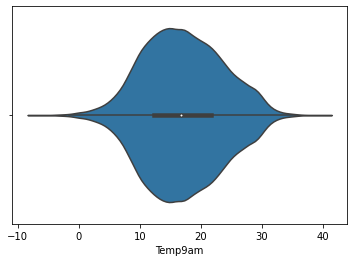

In [58]:
sns.violinplot(x=data[num_column])

In [59]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [60]:
fill_value1 = data[num_column].mean() + 3*data[num_column].std()
IQR = data[num_column].quantile(0.75) - data[num_column].quantile(0.25)
fill_value2 = data[num_column].quantile(0.75) + 1.5*IQR
fill_value3 = data[num_column].quantile(0.75) + 3*IQR

fill_values = [fill_value1,fill_value2,fill_value3]
strategy_params_names = ['Norm','IRQ K=1.5','IRQ K=3']

original_temp_data = data[[num_column]].values
size = original_temp_data.shape[0]
original_data = original_temp_data.reshape((size,))

new_df = pd.DataFrame({'Исходные данные':original_data})
    
for i in range(len(fill_values)):
    fill = fill_values[i]
    col_name = strategy_params_names[i]
    temp_data, _, _ = impute_column(data, num_column, 'constant', fill_value_param=fill)
    new_df[col_name] = temp_data 

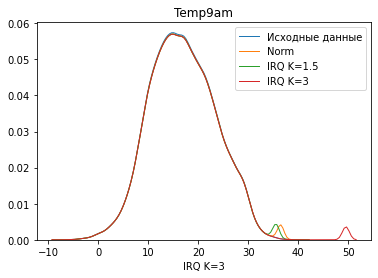

In [67]:
for col in new_df.columns:
    sns.distplot(new_df[col], hist = False, kde = True,
            kde_kws = {'linewidth': 1},
            label = col).set_title(num_column)

# Задача 29

In [68]:
from sklearn.feature_selection import VarianceThreshold

Создадим искусственный набор данных с константным и псевдоконстантным признаками

In [76]:
lst_arr = [[1,2,1,21], [20,2,2,22], [15,2,3,21], [1,2,4,21], 
                [1,2,5,22], [10,1,6,21], [3,2,7,21], [12,1,8,21], [15,2,9,21], [17,2,10,22]]
arr = np.array(lst_arr)
data2 = pd.DataFrame(arr, columns=['f1', 'f2', 'f3', 'f4'])
data2

,f1,f2,f3,f4
0,1,2,1,21
1,20,2,2,22
2,15,2,3,21
3,1,2,4,21
4,1,2,5,22
5,10,1,6,21
6,3,2,7,21
7,12,1,8,21
8,15,2,9,21
9,17,2,10,22


In [78]:
selector = VarianceThreshold(threshold=0.25)
selector.fit(data2)

selector.variances_

array([49.25,  0.16,  8.25,  0.21])

In [79]:
selector.transform(data2)

array([[ 1,  1],
       [20,  2],
       [15,  3],
       [ 1,  4],
       [ 1,  5],
       [10,  6],
       [ 3,  7],
       [12,  8],
       [15,  9],
       [17, 10]])

У двух признаков (f2, f4) дисперсия меньше установленной пороговой, так что они были удалены.

# Скрипичная диаграмма

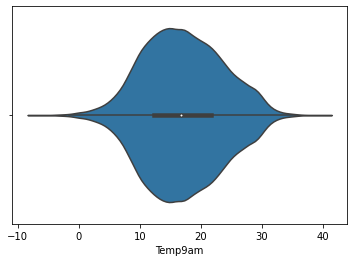

In [80]:
sns.violinplot(x=data[num_column])